# Chapter 7. 2D Body Pose Estimation

> Nothing happens until something moves.
>
> Albert Einstein


## Background

Pose estimation is the problem of determining a human pose from an image or sequence of images. It also serves as a first step for mapping the pose in 3D (or 3D pose estimation) as discussed in the next chapter. For biomechanics, it provides useful kinematic information, and has a multitude of applications.

![](images/ch7/image1.png)

Perhaps, in the future manuals of deep-learning aided biomechanics, this method will have its own chapter, and it certainly deserves one in this book. Pose estimation is used in gaming, film industry, medical, robotics and sports, and recently more widely in other industries, such as retail. In the last few years, deep learning methods in computer vision experience a real breakthrough: methods to predict human poses are getting faster and more precise. For sports, pose estimation brings a near-real time result that can be easily visualized, which is essential for professional athletes and training.

## Methods


> For a successful technology, reality must take precedence over public relations, for nature cannot be fooled.
>
> Richard Feynman

There're two approaches for 2D pose estimation that most models use: top-down and bottom-up. Bottom up approach is the fastest, it focuses on detecting keypoints first, then groups them into poses. The top-down approach detects people in the scene, and then applies a single person keypoints detection. For fast action sports, it may be slower, because it depends on the number of people in the scene, and the risk of failure is higher, because of the early commitment to detect individuals, rather than focusing on joints and individual movements.

**2D Pose Estimation approaches:** Bottom-up approaches recognize joints first and then combine them into pose. Top-down pose estimation works by detecting groups of subjects, and runs a single person detector, for multi-person scene its performance depends on the number of subjects.

Before diving into practical projects, let's to go over basic concepts of pose estimation: methods, datasets and data points, benchmarks and tools a sport data scientist can use.

Most human pose estimation approaches use multi-stage Recurrent Neural Networks (RNN). The main reason being, that video processing, that is the main source of sports analysis, unlike single images, benefits from sequential weight sharing between frames. So, for video, recurrent neural networks that can learn long sequences, such as LSTM (Long Short-Term Memory) between video frames are widely used in many greatly performing models. Some models also use temporal information provided by optical flow to decrease flickering and improve prediction smoothness by tracking joints over time from frame to frame.

There're several deep learning models that work well for pose estimation; some notable examples include:

-   Mask R-CNN, a two-stage method that works by generating proposals (areas of the image) in the first stage, and then creates masks or bounding boxes around areas.

-   Stacked Hourglass Networks, use a method of consecutive top-down, bottom-up steps in conjunction with intermediate supervision for better capturing of spatial relationships associated with the body.

-   Cascade Pyramid Networks (CPN) method deals with keypoints occlusion problems and tarets keypoint localization for the human body.

-   Part Affinity Field method (used for example in OpenPose), a bottom-up system with real time characteristics.

## Datasets

For 2D pose estimation, several widely used datasets are available. Typically, pose estimation models are trained with some of these, providing good accuracy (3D datasets, such as Human3.6, DensePose, UP-3D and others will be covered in the next chapter):

-   COCO (Common Objects in Context) dataset is based on 330K images and a quarter of a million people with keypoints. Microsoft and many other partners contributed to that dataset. The goal is placing the object recognition is the broader context of a scene understanding.

-   MPII includes 25K images with over 40K people and 410 activities: images for this dataset are extracted from YouTube.

-   LSP (Leeds Sports Pose Dataset) contains 2K pose annotated images taken from Flickr and includes 14 joints detected.

-   FLIC (Frames Labeled in Cinema) has about 5K images from Hollywood movies and running a person detector on certain frames.

**Note:** Some datasets available online may be automatically generated (for example from games) or other sources and may not contain precise athletic movements. We'll discuss recording custom datasets with labeled athletic data in Part IV: Machine Learning and Data.

For pose estimation, we expect the data output as keypoints of human body. Body part mapping may be different, depending on what parts of the body you are interested in as a data scientist. For example, a typical keypoint data output using a COCO data set may include 18 body parts, as illustrated on the following figure:

![COCO dataset keypoints](images/ch7/image2.png)


Let's step back for a moment to understand how the concept of humanoid models, and body parts applies to sports movement analysis. From biomechanics, body is typically thought of as frontal, saggital and transverse planes. When coaches do movement analysis, they split body parts of a moving athlete into areas of interest.

When I was an aspiring ski instructor, the first thing they taught me for movement analysis was looking at movements of the "jacket" (upper body) relative to "pants" (lower body). It turns out, this simple categorization of looking at the upper and lower body of a moving athlete provides enough first glance information for a ski instructor to detect a skill level. Most beginners would typically rotate upper body to turn, while a good skier would maintain a quiet upper body, and mostly apply lower body movements of ankles and knees for efficient, balanced turns.

Similarly, to a human coach, pose estimation works by applying segmentation to detect keypoints. From Mask R-CNN to Part Affinity Field employed by OpenPose, neural nets follow the art of coaching in its quintessential form: from detecting areas of interest to segmentation and classification. In our practical projects further in this chapter, we will take that a step further to analyze real sport activities.

## Benchmarks

Benchmark scores across many methods have improved a lot over the last few years. That tells us that computer vision is making gigantic strides towards understanding of human motion and activities. In just one year, for pose estimation COCO mean average precision (mAP) metric has increased from 60% to 72.1%, another benchmark for MPII jumped from 80% to almost 90%! Even an Uber driver after an AI Symposium in Sunnyvale asked me how was Skynet doing, and how close we are to what's predicted in Terminator back in 1984. I'm not sure about Skynet, but Mobilenet, Posenet and many other convolution neural nets are doing very well!

Most MPII winning methods are based on hourglass architecture with repeated bottom-up, top-down processing. Some COCO winning methods are based on CPN (cascaded pyramid network). Evaluation metrics frequently used in pose estimation are PCP percentage of correct parts (PCP), percentage of correct keypoints (PCK), percentage of detected joints (PDJ) and mean per joint position error (MPJPE).

## Tools

For a sport data scientist, there's a wide selection of tools available for 2D pose estimation. Practical projects in this chapter use different tools, to get you familiarized with a wide selection of technologies, rather than focusing on a single toolset. Most of these tools expose Python APIs, since the language became lingua franca of data science, so we'll continue this tradition and will use stock Python, Scikit-learn, OpenCV, PyTorch and Tensorflow for most of our projects for pose estimation.

It's worth mentioning that most deep learning frameworks come packaged as CPU or GPU accelerated. I highly recommend spending a little bit of time to make sure that a GPU accelerated version of these libraries works in your environment! Deep learning using videos is resource intensive, and the difference between 0.3FPS and 30FPS is significant if you are a sport data scientist. Most Python packages have a GPU optimized package version. Oftentimes, investing in a dedicated AI optimized edge device makes a lot of sense.

**Note:** Make sure you are using a GPU accelerated version of these tools or have a dedicated processing unit for deep learning (more on setting up the environment, see Part I).

## Project 7-1: Pose Estimation - Is Your Stance Goofy or Regular?

While I was working on computer vision problems in sports and fitness, I was introduced to the team working with Gabriel Medina Institute and Rip Curl on surfing research. California summer was getting closer, and being an aspiring surfer myself, I couldn't think of a better application for computer vision. I usually go surfing to Pacifica, my favorite beginner/intermediate break about half an hour away from my house. There, I started playing with a prototype of a smart surfing fin sensor and a custom-built computer camera with on-board computer vision. First things first, in surfing we begin by learning how to stand on the surfboard.

![Using 2D pose estimation for surfing popup practice](images/ch7/image3.jpeg)


All board sports have a notion of stance: be it surfboarding, snowboarding or skateboarding. The laterality of your brain impacts how footedness is chosen. Naturally, we stay with our left or right foot forward. It's very easy to test without the board by simply noticing what foot we lift first while stepping on the stair.

![Stair test for determining your stance](images/ch7/image4.png)

"Goofy" or "regular", means that we step with our right or left leg in front of the board. Wouldn't it be cool if our machine learning could help us recognizing the stance?

**Note:** You need to install TensorFlow in your environment to run this project.


![](images/ch7/image5.png)

A goofy surfer (left) vs a regular surfer stance (right)

To get started, we will use a single image of a surfer in the project folder and 2D pose estimation, to detect athlete's stance. We can also use continuous video stream from a web cam, to detect stance continuously in real time.

![](images/ch7/image6.png)

Figure 7-6 Keypoints of a surfer standing on the surfboard

### Finding keypoints

Let's define functions that help us determine stance. But first, we need to create functions that help locating points in the dataset, calculating Euclidian distance between points and calculating angles: 

In [1]:
import math
import time
import pandas as pd
from tf_pose import common
import numpy as np

SK_BOARD_STANCE_GOOFY = "goofy"
SK_BOARD_STANCE_REGULAR = "regular"

def find_point(pose, p):
    for point in pose:
        try:
            body_part = point.body_parts[p]
            return (int(body_part.x * width + 0.5), int(body_part.y * height + 0.5))
        except:
            return (0,0)
    return (0,0)


### Calculating Euclidian distance and angles

Next, let's define functions to calculate Euclidian distance and angles:

In [2]:
def euclidian(point1, point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 )

def angle_calc(p0, p1, p2 ):
    try:
        a = (p1[0]-p0[0])**2 + (p1[1]-p0[1])**2
        b = (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2
        c = (p2[0]-p0[0])**2 + (p2[1]-p0[1])**2
        angle = math.acos( (a+b-c) / math.sqrt(4*a*b) ) * 180/math.pi
    except:
        return 0
    return int(angle)

def center_of_mass(pose):
    joints = np.zeros([common.CocoPart.Background.value, 2])

    for p in pose:
        for i in range(common.CocoPart.Background.value):
            if i not in p.body_parts.keys():
                continue
            body_part = p.body_parts[i]
            joints[i] = [body_part.x,body_part.y]
    
    return np.mean(joints, axis=0)


### Determining surfer stance

Finally, using methods defined earlier to calculate angles, we can get to stance estimation:


In [3]:
def surfing_check_goofy_stance(is_mirror, a, b):
    '''
        is_mirror shows if the camera is mirrored
        a neck L angle
        b neck R angle
    '''
    if not is_mirror:
        if a > b:
            return SK_BOARD_STANCE_GOOFY
        return SK_BOARD_STANCE_REGULAR
    else:
        if a > b:
            return SK_BOARD_STANCE_REGULAR
        return SK_BOARD_STANCE_GOOFY
    
def detect_stance(is_mirror, pose):
    l = angle_calc(find_point(pose,0), find_point(pose,1), find_point(pose,11))
    r = angle_calc(find_point(pose,0), find_point(pose,1), find_point(pose,8))
    
    return surfing_check_goofy_stance(is_mirror, l, r)

Now, it's time to import TensorFlow and supporting modules:

In [4]:
import sys
import time
import os

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import math

import matplotlib.pyplot as plt
%matplotlib inline

BOARD_STANCE_GOOFY = "goofy"
BOARD_STANCE_REGULAR = "regular"

model = "cmu"
image_file = "media/surfer_656x368.jpg"
experiments_dir = "_experiments/"

def draw_str(dst, s, color, scale):
    
    (x, y) = (10,20)

    if (color[0]+color[1]+color[2]==255*3):
        cv2.putText(dst, s, (x+1, y+1), cv2.FONT_HERSHEY_SIMPLEX, scale, (0, 0, 0))
    else:
        cv2.putText(dst, s, (x+1, y+1), cv2.FONT_HERSHEY_SIMPLEX, scale, color)
    #cv2.line    
    cv2.putText(dst, s, (x, y), cv2.FONT_HERSHEY_SIMPLEX, scale, (255, 255, 255))

def init_experiments_dir(experiments_dir = "_experiments/"):
    if not os.path.exists(experiments_dir):
        os.makedirs(experiments_dir)

    experiment_dir = time.strftime("%Y%m%d-%H%M%S")
    out_dir = experiments_dir + experiment_dir
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    output_json = out_dir + "/json/"
    if not os.path.exists(output_json):
        os.makedirs(output_json)
    return out_dir, output_json



Initialize pose estimator and read the image:


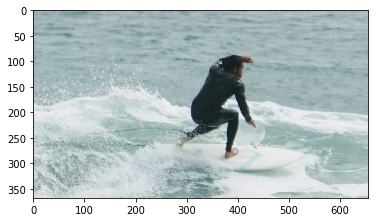

In [5]:
# initialize and load images
out_dir, output_json = init_experiments_dir(experiments_dir)
image = common.read_imgfile(image_file, None, None)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# load estimator
h, w, channels = image.shape

if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(w, h))

[2019-10-01 19:16:31,866] [TfPoseEstimator] [INFO] loading graph from C:\ProgramData\Anaconda3\lib\site-packages\tf_pose-0.1.1-py3.7-win-amd64.egg\tf_pose_data\graph/cmu/graph_opt.pb(default size=656x368)


Instructions for updating:
Colocations handled automatically by placer.


Start inference and estimate the stance

inference started...
STANCE goofy


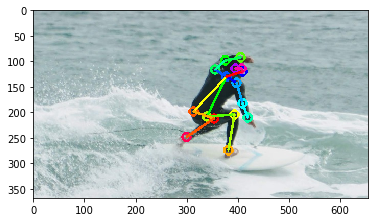

In [7]:
print('inference started...')
t = time.time()
pose = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

print("STANCE "+ detect_stance(True, pose))

image = TfPoseEstimator.draw_humans(image, pose, imgcopy=False, output_json_dir=out_dir )    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

How it works? This example uses Tensorflow and OpenPose for pose estimation. The method we use to determine the stance is by estimating the angle between head and hips. A greater angle between left hip and the head means that the athlete is standing in goofy stance, when the camera is not using mirrored mode. Otherwise, we assume that the stance is regular. It's important to notice that in selfies mode, most cameras mirror the image, so to determine stance correctly, we need to pass an argument to the method to tell it whether camera or image is mirrored. In detect\_stance function we calculate angles between the keypoints, then check stance condition in surfing\_check\_goofy\_stance function.

To run stance estimation using live web cam real-time, check utils/dtw/pose\_estimation\_webcam.py. That script will use your web cam, instead of the image to detect stance, similarly we can use a video file as an input.


## Activity Recognition

> Fall in love with some activity, and do it!
>
> Richard Feynman

In the stance detection project we looked at a very simple problem, by focusing on an individual image or frames. This easy approach quickly gets results for estimating a static pose, but since most of the sports are recorded on video, we can improve precision and recognize entire activities, as sequences of events, rather than looking at static poses.

![](images/ch7/image8.png)

Recognizing activity using rules is useful to understand joint mechanics, but we can also use deep learning methods for activity recognition. Methods for temporal classifications have evolved: Dynamic Time Warping (DTW), Hidden Markov Models (HMM), Temporal Convolutional Networks (TCNs), recurrent neural networks with LSTM neurons, and others to analyze human movements.

## Dynamic Time Warping (DTW)

Dynamic Time Warping helps finding similarities in temporal sequences. For a coach, this is the Holy Grail of sports science! Here's the essence of coaches' work: run after run, athletes perform activities that need to be analyzed, compared with best performing athletes (models) and athlete's own results, then the feedback provided to the athlete that summarizes areas of improvements. Applying methods that take into account time, such as DTW, to each set of activities can help us train the model to detect activities as they happen dynamically, and from the coach prospective: detect issues with the movements! For a practical sports scientist looking to analyze athlete movements, this sounds like a great solution, however it's worth mentioning that like all methods, DTW needs to be applied constrained, and using sets of data that imply similarity.

In our quest for AI coach, we'll build a quick pipeline to detect some basic activities from temporal sequences and provide a feedback. But first, some basic ideas behind this method.

## Project: Appying DTW to pose estimation keypoints

### Getting project data

From project 7-1 you already know how to get a 2D body pose estimation, using either a static image, video or a webcam. Using tools, such an OpenPose, it's easy to save keypoints into a JSON file, for each frame and each person detected. Conveniently, OpenPose provides methods for saving keypoints out of the box, by using ---write\_json flag:

```bash
$openpose.bin --model_pose COCO --video media/video.avi --write_json media/json
```

This instructs OpenPose to process our video file, using COCO model, and save keypoints in JSON files. The output is a single JSON file per frame, similar to the following, where pose\_keypoints\_2 represents an array of 18 keypoint parts locations, followed by confidence value, e.g. \[x1,y1,c1,x2,y2,c2,...\]:

```json
{
    "version": 1.3,
    "people": [
    {
        "person_id": [-1],
        "pose_keypoints_2d": [
            413.834,
            102.427,
            0.896774,
```

...

Since we requested COCO pose model, we'll get 18 keypoints. Other options are 25 keypoints (COCO+feet) and MPI (15 keypoints) which may be useful depending on whether we need to get faster performance or mode data for human pose analysis. We are interested in x and y positions, so we'll reshape the array (MODEL\_KEYPOINTS=18 for COCO pose model):

pose\_keypoints\_2d.reshape((MODEL\_KEYPOINTS, 3))

For an example on how to load keypoints from 2D pose estimation into a NumPy array, look at utils\_load\_keypoints notebook.


### Basic idea

We will run DTW on the set of keypoints detected earlier with 2D Pose Estimation. The code to parse and load OpenPose keypoints is in pose module:

In [8]:
from utils.keypoints import pose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report
%matplotlib inline

def load_features(names):
    output = [] 
    for filename in names:
        ps = pose.PoseSequence.load('data/dtw/sample/'+filename)
        poses = ps.poses

        right_present = [1 for pose in poses 
                if pose.rshoulder.exists and pose.relbow.exists and pose.rwrist.exists]
        left_present = [1 for pose in poses
                if pose.lshoulder.exists and pose.lelbow.exists and pose.lwrist.exists]
        right_count = sum(right_present)
        left_count = sum(left_present)
        side = 'right' if right_count > left_count else 'left'

        if side == 'right':
            joints = [(pose.rshoulder, pose.relbow, pose.rwrist, pose.rhip, pose.neck) for pose in poses]
        else:
            joints = [(pose.lshoulder, pose.lelbow, pose.lwrist, pose.lhip, pose.neck) for pose in poses]

        # filter out data points where a part does not exist
        joints = [joint for joint in joints if all(part.exists for part in joint)]
        
        upper_arm_vecs = np.array([(joint[0].x - joint[1].x, joint[0].y - joint[1].y) for joint in joints])
        forearm_vecs = np.array([(joint[2].x - joint[1].x, joint[2].y - joint[1].y) for joint in joints])
        
        upper_arm_vecs = upper_arm_vecs / np.expand_dims(np.linalg.norm(upper_arm_vecs, axis=1), axis=1)
        forearm_vecs = forearm_vecs / np.expand_dims(np.linalg.norm(forearm_vecs, axis=1), axis=1)
        
        upper_arm_forearm_angle = np.degrees(np.arccos(np.clip(np.sum(np.multiply(upper_arm_vecs, forearm_vecs), axis=1), -1.0, 1.0)))
        upper_arm_forearm_angle_filtered = medfilt(medfilt(upper_arm_forearm_angle, 5), 5)

        output.append(upper_arm_forearm_angle_filtered.tolist())
    return output

   
def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(x)-1
    j = len(y)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([i, j])
    path.append([0,0])
    for [x,y] in path:
        cost = cost +distances[x,y]
    return path, cost    


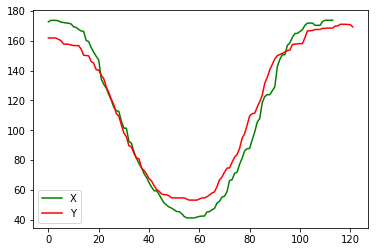

In [9]:
data = load_features(['x.npy','y.npy'])
x = data[0]
y = data[1]
plt.plot(x, 'g', label='X')
plt.plot(y, 'r', label='Y')
plt.legend();
plt.show()

It looks like there's similarity in this data, but the speed and duration are different. A naïve approach to find similarities is finding Euclidian distances, by simply looking at points that can be matched together:

In [10]:
distances = np.zeros((len(x), len(y)))
distances.shape
for i in range(len(x)):
    for j in range(len(y)):
        distances[i,j] = (x[i]-y[j])**2 
distances

array([[120.32803063, 120.32803063, 120.32803063, ...,   3.63993664,
          4.15945387,  12.25589118],
       [139.93723107, 139.93723107, 139.93723107, ...,   7.66157589,
          8.40749055,  19.01775303],
       [139.93723107, 139.93723107, 139.93723107, ...,   7.66157589,
          8.40749055,  19.01775303],
       ...,
       [142.24034099, 142.24034099, 142.24034099, ...,   8.20767431,
          8.97910823,  19.87272611],
       [142.24034099, 142.24034099, 142.24034099, ...,   8.20767431,
          8.97910823,  19.87272611],
       [142.24034099, 142.24034099, 142.24034099, ...,   8.20767431,
          8.97910823,  19.87272611]])

Visualizing the cost matrix for distances shows that diagonal elements have lower distance.

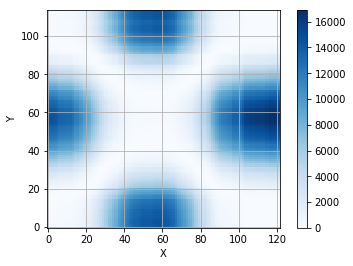

In [11]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Blues') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar()

distance_cost_plot(distances)
plt.show()

The optimal warping path between X and Y is defined as warping path having minimal total cost among all possible paths. The DTW distance is defined as the total cost of p:

$$\text{DTW}\left( X,Y \right) ≔ c_{p}\left( X,Y \right) = \min_{}{\left\{ c_{p}\left( X,Y \right)\  \right|\text{\p\ is\ an\ }\left( N,M \right)\ warping\ path\}}$$

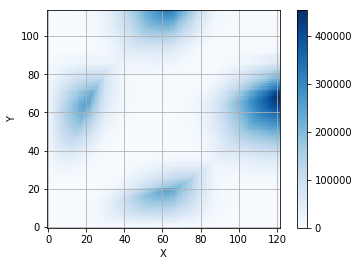

In [12]:
accumulated_cost = np.zeros((len(x), len(y)))
accumulated_cost[0,0] = distances[0,0]
for i in range(1, len(x)):
    accumulated_cost[i,0] = distances[i,0] + accumulated_cost[i-1,i] 
for i in range(1, len(x)):
    for j in range(1, len(y)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
        
distance_cost_plot(accumulated_cost)

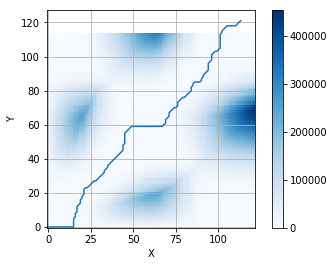

2238.139192931555


In [13]:
path = [[len(x)-1, len(y)-1]]
i = len(x)-1
j = len(y)-1
while i>0 and j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j= j- 1
    path.append([i, j])
path.append([0,0])

path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y)
plt.show()

path, cost = path_cost(x, y, accumulated_cost, distances)
print(cost)

We can check our calculations by using a stock Python library, such as FastDTW to test the results.

488.70072893464635


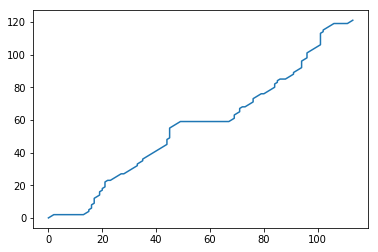

In [14]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

path_x = [point[0] for point in path]
path_y = [point[1] for point in path]
plt.plot(path_x, path_y)
plt.show()

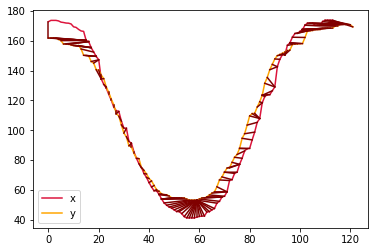

In [15]:
plt.plot(x, 'crimson' ,label='x')
plt.plot(y, 'orange',label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'maroon')
plt.show()

Which gives us similar results: both paths look very similar. Dynamic Time Warping is a useful technique for analyzing temporal sequences and finding similarities in sequences.

## Detecting skill level

Detecting a skill level in sports is one of the most important problems for a coach: from the moment we see an athlete, neural networks in our brain attempt to classify movements of that athlete, analyzing how good of an athlete that is. Parhaps, this natural function of our brains is related to our basic survival instincts: this classification is trained to be super-fast, in an attempt to protect us from unfriendly or dangerous acts. Since ancient times, we had to quickly estimate the level of danger; with the evolution of human society, we instinctively look for individuals who we can learn from, by classifying or comparing our own skill to theirs.

Most modern sports developed comprehensive systems that define levels. For example, Professional Ski and Snowboard Instructors of America have defined 10 skill levels that help classify skiers and recommend course of training. Generally, most sports classify athletes' skill as beginner, intermediate and advanced (experts). In our next project we will use pose estimation to tell an advanced athlete from a beginner.

### Using pose estimation for skill level detection

For this project we'll dive into skiing, a highly dynamic sport. Even if you are not a skier, by using data from pose estimation, you'll be able to use methods described earlier to tell an advanced level athlete from a beginner.

![](images/ch7/image13.jpeg)

Figure 7-13 Athlete with advanced skill level: body pose keypoints

Let's look at a beginner level skier, in this case a kid skiing wedge type of turn in a typical beginner stance. Apart from balance and center of mass being impacted by body proportions (for kids, their head is bigger relative to the body), a professional instructor can immediately identify a number of elements typical for beginners. Let's see if we can use machine learning methods to help us identify those and predict skill levels of athletes.

![](images/ch7/image14.png)

Figure 7-14 Keypoints and pose of a beginner skier

Looking at the body position, notice that the center of mass (CM) of the skier is far back, instead of being on top of the center of the skis. Angle β between torso and hips tends to be high, the kid is "sitting back", which is very typical for kids skiing but is also characteristic for beginner adult skiers.

![](images/ch7/image15.png)

Figure 7-15 Keypoints visualization of a beginner skier

Note also the neck angle α: beginners tend to look at the ski tips, instead of looking straight, about 3 turns ahead, as advanced skiers do, the neck is also extended forward to compensate for the backward body position. Many beginners tend to use upper body to turn, instead of using ankles and knees. On the video it's clear that what's happening here is hips, ankles and knees stay static, locked in so-called A-frame pose, while the upper body swings, providing a momentum for turn.

![](images/ch7/image16.png)

Figure 7-16 Beginner skier visualization sequence

We will use an advanced skier dataset and a dataset from the beginner skier to compare and predict the skill level based on differences in body joints relations. First, we get neck and torso vectors from body parts:

In [16]:
import numpy as np
import math
import glob
import utils

from utils.keypoints import pose, utils
from pprint import pprint
from scipy.signal import medfilt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report

files = utils.files_in_order('data/dtw/skiing/experiments')
#print(files)
X_train_names, X_test_names = train_test_split(files, test_size=0.4, random_state=42)
y_train = utils.get_labels_by_level(X_train_names)
y_test = utils.get_labels_by_level(X_test_names)
pprint(X_train_names)
pprint(y_train)
pprint(X_test_names)
pprint(y_test)

array(['skicarve_expert_1.npy', 'skikidwedge_beginner_1.npy'],
      dtype='<U26')
array([1, 0])
array(['skicarve_expert_2.npy', 'skikidwedge_beginner_2.npy'],
      dtype='<U26')
array([1, 0])


Max torso/neck angle:  82.75143413220597


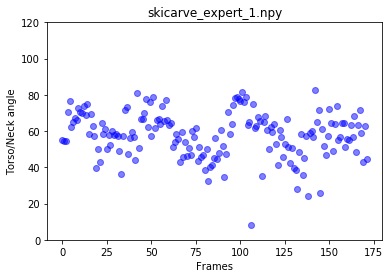

Max torso/neck angle:  112.85492870025797


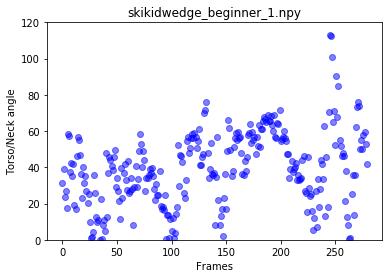

Max torso/neck angle:  82.75143413220597


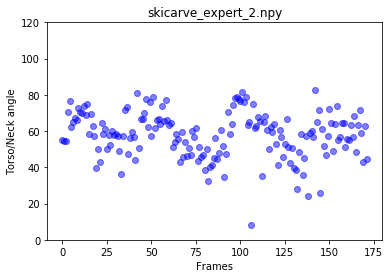

Max torso/neck angle:  112.85492870025797


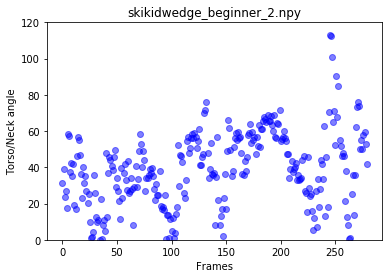

In [17]:
def load_features(names):
    output1 = [] # List of upper arm torso angles
    output2 = [] # List of forearm upper arm angles
    for filename in names:
        ps = pose.PoseSequence.load('data/dtw/skiing/experiments/'+filename)
        poses = ps.poses

        dominant_side = utils.get_side(poses)
    
        if dominant_side == 'right':
            joints = utils.get_joints([(pose.nose, pose.neck, pose.rhip) for pose in poses])
        else:
            joints = utils.get_joints([(pose.nose, pose.neck, pose.lhip) for pose in poses])

        # looking down at skis
        neck = utils.get_normalized_joint_vector(joints, 0, 1)
        torso = utils.get_normalized_joint_vector(joints, 1, 2)
        angles = utils.get_angle(torso, neck)
        angles_filtered = medfilt(medfilt(angles, 5), 5)
        print("Max torso/neck angle: ", np.max(angles))
        utils.chart(angles, filename, 'Torso/Neck angle', 'blue')

        joints = utils.get_joints([(pose.rhip, pose.lhip, pose.rknee, pose.lknee, pose.rankle, pose.lankle) for pose in poses])

        rhip = utils.get_normalized_joint_vector(joints, 0, 2)
        lhip = utils.get_normalized_joint_vector(joints, 1, 3)
        rankle = utils.get_normalized_joint_vector(joints, 2, 4)
        lankle = utils.get_normalized_joint_vector(joints, 3, 5)

        # calculate angles
        rknee_angle = utils.get_angle(rhip, rankle)
        lknee_angle = utils.get_angle(lhip, lankle)
        
        rknee_angle_filtered = medfilt(medfilt(rknee_angle, 5), 5)
        lknee_angle_filtered = medfilt(medfilt(lknee_angle, 5), 5)
        
        output1.append(angles_filtered.tolist())
        output2.append(lknee_angle_filtered.tolist())
    return output1, output2

X_train_1, X_train_2 = load_features(X_train_names)
X_test_1, X_test_2 = load_features(X_test_names)

Result clearly shows that the beginner skier has upper body rotating and swinging a lot more than an advanced athlete. This result tells us what a ski instructor could explain in a few seconds by observing both skiers: quiet upper body of a more advanced athlete, and turns initiated from ankles and knees, vs swinging the body in case of a beginner.

## Multi-person pose estimations

Many sports involve a multi-player action, so it is important to detect groups of people. Fortunately, most methods we discussed above for 2D and 3D body pose estimations apply for detection in the group. One of the most important aspects of group detection for sports scenarios is performance (earlier we discussed top-down and bottom-up approaches to pose estimation).

![](images/ch7/image19.jpeg)

Fortunately for sport data scientists, 2D pose estimation works really well in multi-person scenario. In the following project, we will use a simple people count, detected from pose estimation.

### Project: Counting people with multi-person pose estimation

From previous examples, we already initialized TensorFlow, let's load an image with multiple subjects:

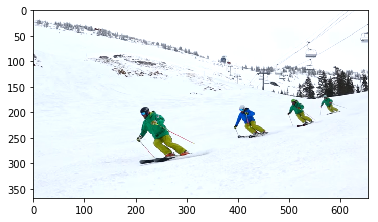

In [18]:
import sys
import time
import os

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import math

import matplotlib.pyplot as plt
%matplotlib inline

model = "cmu"
image_file = "media/multiple_skiers_656x368.png"
image = common.read_imgfile(image_file, None, None)
  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Now ley's simply use len(people) to get the size of the array from the inference:

[2019-10-01 19:17:39,422] [TfPoseEstimator] [INFO] loading graph from C:\ProgramData\Anaconda3\lib\site-packages\tf_pose-0.1.1-py3.7-win-amd64.egg\tf_pose_data\graph/cmu/graph_opt.pb(default size=656x368)


Loading TensorFlow
inference started...
NUMBER OF PEOPLE  4


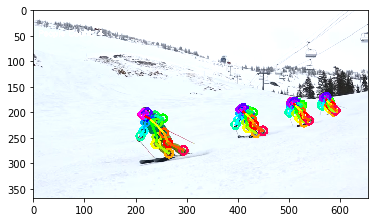

In [19]:
h, w, channels = image.shape

print("Loading TensorFlow")
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(w, h))
    
    
experiments_dir = "_experiments"
if not os.path.exists(experiments_dir):
    os.makedirs(experiments_dir)

experiment_dir = time.strftime("%Y%m%d-%H%M%S")
out_dir = experiments_dir + experiment_dir
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

output_json = out_dir + "/json/"
if not os.path.exists(output_json):
    os.makedirs(output_json)

print('inference started...')
t = time.time()
people = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
count_people = len(people)
print("NUMBER OF PEOPLE ", count_people)
image = TfPoseEstimator.draw_humans(image, people, imgcopy=False, output_json_dir=output_json ) 
cv2.putText(image,
            "People Count: %d" % (count_people),
            (10, 50),  cv2.FONT_HERSHEY_SIMPLEX, 0.5,
            (255, 255, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Once we have a group of people detected, we could apply prediction methods, such as LSTM or use techniques such as dynamic time warping to predict the path of individual within a group.

## Dealing with loss and occlusion

Occasionally, models may exclude points that are completely hidden from the observer (keypoint probability drops to 0.0 in our data). As a practical data scientist, you can deal with the problem in many ways. Depending on the activity: a data scientist may have an option of installing additional cameras with additional view angles to reduce the number of occluded parts. This method is called multi-view video triangulation. Depth sensors, such as LIDARs may provide additional information, as in the case mentioned earlier in this book with AI judging system in gymnastics. If the activity you're studying allows the use of additional sensors (such as IMUs) and the activity allows placing sensors on athlete's body: inertial movement sensors don't suffer from optical occlusion, and are discussed in other parts of this book, dedicated to sensors and hybrid methods.

One simple method, based on the datasets we are dealing with, is including only the frames with joints present across all frames. This approach is used in get\_joints method defined in utils.py in projects for this chapter:

```python
joints = [joint for joint in poses if all(part.exists for part in joint)]
```

Despite occlusion, pose estimation remains a very robust, practical and near real-time method for movement analysis in sports.

Summary
=======

In this chapter we looked at 2D body pose estimation applications for sports. 2D body pose estimations methods and models have reached maturity and precision. We demonstrated in the projects in this chapter, with highly dynamic sports, including surfing and skiing. Pose estimation can be applied in sports movement analysis, if you are willing to accept occasional instances of occlusion and exclude frames with loss of keypoints. In the next chapter we extend techniques we used in 2D body pose estimation to three-dimensional models.
  